1918 1233
Projection Matrix before undistortion is: [[-5.45141949e+03  3.75017493e+02  3.16853322e+03  9.78394528e+02]
 [ 7.03172010e+02  5.96213700e+03  7.66674871e+02  2.04320008e+01]
 [-1.10980146e+00  4.00652019e-01 -1.08620213e+00  1.00000000e+00]]
Camera Calibration Matrix before undistortion is: [[3.78973554e+03 0.00000000e+00 1.07253488e+03]
 [0.00000000e+00 3.76172113e+03 3.01552130e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Rotation Matrix before undistortion is: [[-0.7010966  -0.00899928  0.71300951]
 [ 0.17203026  0.96824999  0.18137681]
 [-0.69200372  0.24982188 -0.67728863]]
The Radial Distortion Parameters are 
 [[ 8.17420884e-01 -1.08688517e+01 -2.12979640e-02  2.60678703e-02
   6.70224886e+01]]


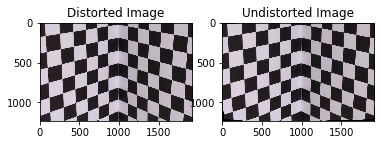

In [19]:
#Obtaining the undistorted image
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('Fig1.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
pix=np.zeros((22,2),np.float32)
W=np.empty((22,3),np.float32)
K=np.array([[-4.02307643e+03, -6.51346316e+01, 960],
 [-0.00000000e+00, -3.99520617e+03,  616],
 [-0.00000000e+00, -0.00000000e+00,  1.00000000e+00]],np.float32)
temp_K = K.copy()
temp_K[ 0 , 1 ] = 0
temp_K[ 0 , 0 ] = abs(K[0,0])
temp_K[ 1 , 1 ] = abs(K[1,1])
objpoints=[]
imgpoints=[]
print(img.shape[1],img.shape[0])
pix[:,0]=[852,853,855,857,857,858,859,861,249,260,271,280,290,296,1233,1228,1225,1221,1220,1216,1218,1217]
pix[:,1]=[40,210,377,539,698,854,1007,1160,136,330,519,704,885,1061,65,241,413,581,746,907,1065,1219]
W[:,0]=[0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.14,0.14,0.14,0.14,0.14,0.14,0,0,0,0,0,0,0,0]
W[:,1]=[0,0.028,0.056,0.084,0.112,0.14,0.168,0.196,0,0.028,0.056,0.084,0.112,0.14,0,0.028,0.056,0.084,0.112,0.14,0.168,0.196]
W[:,2]=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.056,0.056,0.056,0.056,0.056,0.056,0.056,0.056]
objpoints.append(W)
imgpoints.append(pix)

ret,mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, (img.shape[1],img.shape[0]),temp_K,None,None,
                                                  flags = (cv2.CALIB_USE_INTRINSIC_GUESS))
rotation_mat = np.zeros(shape=(3, 3))
R = cv2.Rodrigues(rvecs[0], rotation_mat)[0]
P = np.column_stack((np.matmul(mtx,R),np.matmul(mtx,tvecs[0])))
P=P/P[2,3]
print('Projection Matrix before undistortion is:',P)
print('Camera Calibration Matrix before undistortion is:',mtx)
print('Rotation Matrix before undistortion is:',R)

h,w = img.shape[: 2 ]
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h), 1 ,(w,h))
print( "The Radial Distortion Parameters are \n" ,dist)
# undistort
img_undistorted = cv2.undistort(img, mtx, dist, None , newcameramtx)
img_undist =img_undistorted*255
cv2.imwrite('./undist.jpg',img_undist)
plt.subplot( 121 )
plt.imshow(img)
plt.title( "Distorted Image" )

plt.subplot( 122 )
plt.imshow(img_undistorted)
plt.title( "Undistorted Image" )
plt.savefig('undistorted_im.jpg')
plt.show()

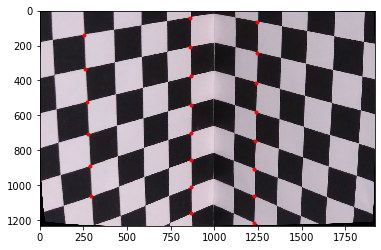

Projection Matrix after undistortion and performing DLT is: [[ 6.22428991e-01 -4.18347147e-02 -3.64991116e-01 -1.11029347e-01]
 [-7.94980313e-02 -6.71669576e-01 -8.84415785e-02 -2.01587695e-03]
 [ 1.25306303e-04 -4.40138935e-05  1.19985601e-04 -1.12105574e-04]]
Camera Calibration Matrix after undistortion and performing DLT is: [[-3.87823552e+03 -6.43814108e+00  1.12506367e+03]
 [-0.00000000e+00 -3.80068841e+03  2.80610276e+02]
 [-0.00000000e+00 -0.00000000e+00  1.00000000e+00]]
Rotation Matrix after undistortion and performing DLT is: [[ 0.69387004  0.0126783  -0.71998863]
 [-0.16855256 -0.96920999 -0.17950493]
 [-0.70009599  0.24590902 -0.67036882]]
Translation vector after undistortion and performing DLT is: [0.02167661 0.04328039 0.6263425 ]


In [23]:
# Implementation of DLT on undistorted image
import matplotlib.pyplot as plt
import numpy as np

img = plt.imread('undist.jpg')
pix=np.empty((22,2))
W=np.empty((22,3))
pix[:,0]=[862,862,864,867,866,866,867,868,253,260,271,279,288,295,1247,1245,1241,1237,1234,1229,1229,1226]
pix[:,1]=[40,209,377,540,700,856,1009,1160,140,333,522,708,889,1064,66,241,413,582,746,906,1062,1215]
W[:,0]=[0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.14,0.14,0.14,0.14,0.14,0.14,0,0,0,0,0,0,0,0]
W[:,1]=[0,0.028,0.056,0.084,0.112,0.14,0.168,0.196,0,0.028,0.056,0.084,0.112,0.14,0,0.028,0.056,0.084,0.112,0.14,0.168,0.196]
W[:,2]=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.056,0.056,0.056,0.056,0.056,0.056,0.056,0.056]
plt.plot(pix[:,0],pix[:,1],'r.')  

plt.imshow(img)
plt.show()

M=np.empty((44,12))
j=0
for i in range(22):
    M[j,:]=[W[i,0],W[i,1],W[i,2],1,0,0,0,0,-pix[i,0]*W[i,0],-pix[i,0]*W[i,1],-pix[i,0]*W[i,2],-pix[i,0]]
    M[j+1,:]=[0,0,0,0,W[i,0],W[i,1],W[i,2],1,-pix[i,1]*W[i,0],-pix[i,1]*W[i,1],-pix[i,1]*W[i,2],-pix[i,1]]
    j+=2
    
(U, S, V) = np.linalg.svd(M, full_matrices=True)
f = V[-1,:]
P =np.reshape(f,(3,4))


from scipy import linalg
KR=P[:,0:3]
K,R=linalg.rq(KR)
t=np.matmul(np.linalg.inv(K),P[:,-1])
K=K/K[2,2]
print('Projection Matrix after undistortion and performing DLT is:',P)
print('Camera Calibration Matrix after undistortion and performing DLT is:',K)
print('Rotation Matrix after undistortion and performing DLT is:',R)
print('Translation vector after undistortion and performing DLT is:',t)

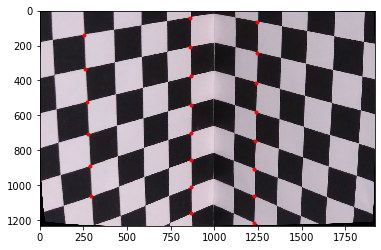

diff_norm_chosen [1.56177285]
Projection Matrix after undistortion and performing DLTis: [[-6.20076782e-01  4.23143901e-02  3.68750961e-01  1.10721397e-01]
 [ 8.13356654e-02  6.71446787e-01  8.95435808e-02  1.84472873e-03]
 [-1.24328977e-04  4.43177850e-05 -1.19413730e-04  1.11918059e-04]]
Camera Calibration after undistortion and performing DLT Matrix is: [[-3.90753468e+03 -9.29400051e+00  1.10269322e+03]
 [ 0.00000000e+00 -3.82263171e+03  2.82560788e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Rotation Matrix after undistortion and performing DLT is: [[ 0.69483027  0.01172744 -0.71907814]
 [-0.17117294 -0.96843594 -0.18119507]
 [-0.69850607  0.24898654 -0.67089118]]
Translation Matrix after undistortion and performing DLT is: [0.01814127 0.04376676 0.62877895]


In [24]:
# RANSAC Implementation after Distortion
import matplotlib.pyplot as plt
import numpy as np
from random import sample
from scipy import linalg

img = plt.imread('undist.jpg')
pix=np.empty((22,2))
W=np.ones((22,4))
pix[:,0]=[862,862,864,867,866,866,867,868,253,260,271,279,288,295,1247,1245,1241,1237,1234,1229,1229,1226]
pix[:,1]=[40,209,377,540,700,856,1009,1160,140,333,522,708,889,1064,66,241,413,582,746,906,1062,1215]
W[:,0]=[0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.028,0.14,0.14,0.14,0.14,0.14,0.14,0,0,0,0,0,0,0,0]
W[:,1]=[0,0.028,0.056,0.084,0.112,0.14,0.168,0.196,0,0.028,0.056,0.084,0.112,0.14,0,0.028,0.056,0.084,0.112,0.14,0.168,0.196]
W[:,2]=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.056,0.056,0.056,0.056,0.056,0.056,0.056,0.056]
plt.plot(pix[:,0],pix[:,1],'r.')  
plt.imshow(img)
plt.show()
RANSAC_iter=150
M=np.empty((12,12))
diff=np.empty((22,1))
num_points =[i for i in range(22)]
diff_norm=np.empty((RANSAC_iter,1))
P_=np.empty((RANSAC_iter,3,4))
norm=101
while norm>3.5:
    for k in range(RANSAC_iter): # RANSAC iterations
        six_p = sample(num_points, 6)
        #print(six_p)
        j=0
        for i in six_p:
            M[j,:]=[W[i,0],W[i,1],W[i,2],1,0,0,0,0,-pix[i,0]*W[i,0],-pix[i,0]*W[i,1],-pix[i,0]*W[i,2],-pix[i,0]]
            M[j+1,:]=[0,0,0,0,W[i,0],W[i,1],W[i,2],1,-pix[i,1]*W[i,0],-pix[i,1]*W[i,1],-pix[i,1]*W[i,2],-pix[i,1]]
            j+=2
        (U, S, V) = np.linalg.svd(M, full_matrices=True)
        f = V[-1,:]
        P_[k] =np.reshape(f,(3,4))
        for i in range(22):
            PX=np.matmul(P_[k],W[i])
            PX=PX/(PX[2]+0.0000001)
            diff[i]=np.linalg.norm(pix[i]-PX[0:2])
        diff_norm[k]=np.sum(diff)/22
    norm=np.min(diff_norm[:,0])
    #print(norm)
idx_min= np.argmin(diff_norm)
P=P_[idx_min]
print('diff_norm_chosen',diff_norm[idx_min])
#print(P)   
KR=P[:,0:3]
K,R=linalg.rq(KR)
t=np.matmul(linalg.pinv(K),P[:,-1])
K=K/K[2,2]
print('Projection Matrix after undistortion and performing DLTis:',P)
print('Camera Calibration after undistortion and performing DLT Matrix is:',K)
print('Rotation Matrix after undistortion and performing DLT is:',R)
print('Translation Matrix after undistortion and performing DLT is:',t)